<a href="https://colab.research.google.com/github/Biranjay-kumar/Biranjay/blob/main/Transfer_Learning_with_TensorFlow_Part_2_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05. Transfer Learning with TensorFlow Part 2: **Fine-tuning**
In the previous section, we saw how we could leverage feature extraction transfer learning to get far better results on our Food Vision project than building our own models (even with less data).

Now we're going to cover another type of transfer learning: **fine-tuning**.

In **fine-tuning** transfer learning the pre-trained model weights from another model are unfrozen and tweaked during to better suit your own data.

For feature extraction transfer learning, you may only train the top 1-3 layers of a pre-trained model with your own data, in **fine-tuning** transfer learning, you might train 1-3+ layers of a pre-trained model (where the '+' indicates that many or all of the layers could be trained).

### Creating healper function
in previous nootbook we have make so many function for many type of works so, now we do is we import them directly from a github and use them directly isse kya hoga ki time bach jayega

In [ ]:
# Creating healper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-07-26 12:41:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-26 12:41:07 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

🔑 Note: If you're running this notebook in Google Colab, when it times out Colab will `delete` the helper_functions.py file. So to use the functions imported above, you'll have to rerun the cell.

##Let's Get some data
This time we are going to see how we can use Pretrained models within `tf.keras.application` and apply them to our own problem (recognising theee food images)
> Link : https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [ ]:
# Get 10_percent_of_training_data of 10 classes of food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-07-26 12:41:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   212MB/s    in 0.8s    

2023-07-26 12:41:12 (212 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Check out how many images and subdirectories in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
# Create training and testing directory path
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
train_data_10_percent.take

<bound method DatasetV2.take of <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>>

In [ ]:
# See an example of batch of data
for images, labels, in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   ...
   [3.60000000e+01 1.00000000e+00 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.90000000e+01 0.00000000e+00 0.00000000e+00]]

  [[3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   ...
   [3.75714722e+01 2.14263916e-01 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]]

  [[3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   [3.60000000e+01 0.00000000e+00 0.00000000e+00]
   ...
   [3.80459137e+01 0.00000000e+00 0.00000000e+00]
   [3.75714264e+01 2.14285851e-01 0.00000000e+00]
   [3.60000000e+01 1.00000000e+00 0.00000000e+00]]

  ...

  [[3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3

##Model_0 : building a transfer learning `feature-extraction` Model using keras functional API
The Sequential API is straight-forward, it runs our layer in sequential order.
But the functional API gives us more flexibility with our models

In [ ]:
#Create the base model with tf.keras.application
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeeze the base model (so that the underlaying pretrained patterns are'nt update)
base_model.trainable=False

# Create Input label into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")

# if you are using resnet you need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Pass the inputs to the base model
x = base_model(inputs)
print(f"shape after passing input through base model: {x.shape}")

#Average pool outputs of base model (Aggregate all the most important informations and reduce the numbe rof computation)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooloing2D : {x.shape}")

# Create the output activation layers
outputs = tf.keras.layers.Dense(10, activation = "softmax", name="output_layer")(x)

# Combine inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

#Compile the model
# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step
shape after passing input through base model: (None, 7, 7, 1280)
shape after GlobalAveragePooloing2D : (None, 1280)


In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
                                 )

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230726-124125


Epoch 1/5
24/24 [==============================] - 28s 352ms/step - loss: 1.8805 - accuracy: 0.4280 - val_loss: 1.3180 - val_accuracy: 0.7023
Epoch 2/5
24/24 [==============================] - 5s 178ms/step - loss: 1.0941 - accuracy: 0.7760 - val_loss: 0.8898 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - 5s 162ms/step - loss: 0.7922 - accuracy: 0.8187 - val_loss: 0.7339 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - 4s 146ms/step - loss: 0.6407 - accuracy: 0.8520 - val_loss: 0.6342 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 5s 180ms/step - loss: 0.5336 - accuracy: 0.8680 - val_loss: 0.5837 - val_accuracy: 0.8553


In [ ]:
# Evaluate on the full data set
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5576 - accuracy: 0.8600


[0.557564377784729, 0.8600000143051147]

In [ ]:
# Check the layers in the bae model
for layer_number, layer in enumerate(base_model.layers) :
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
# Summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

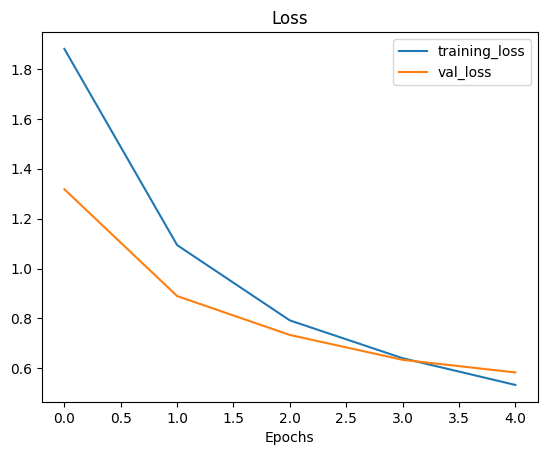

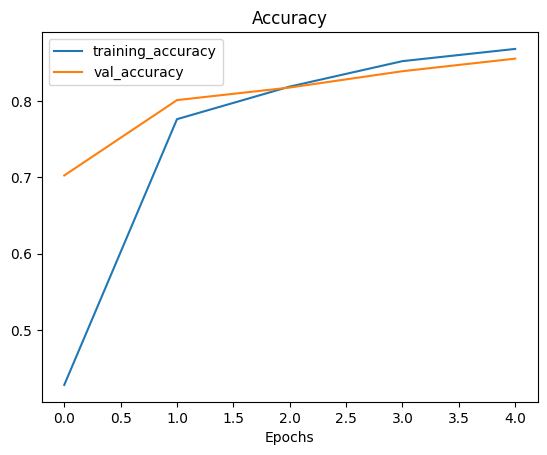

In [ ]:
# check out our model loss curves
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model
Let's demonstrate the global average pooling 2D layer...
We Have a tensor after our model goes through  `base_model` of shape (None, 7, 7, 1280).
But when we pass that model through GlobalAveragePooling2D, it turns into (None, 1280)

Let's use a similar tensor (1, 4, 4, 3) and then pass it through GlobalAveragePooling2D.

In [ ]:
# Define input shape
input_shape = (1, 4, 4, 3)

# Create random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor : \n {input_tensor} \n")

Random input tensor : 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 



In [ ]:
# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"2D global average pooled random tensor : \n{global_average_pooled_tensor} \n")

2D global average pooled random tensor : 
[[-0.09368646 -0.45840448 -0.2885598 ]] 



In [ ]:
# Check the shape of the different tensors
print(f"shape of input tensor : {input_tensor.shape}\n")
print(f"shape of global average pooled layer : {global_average_pooled_tensor.shape}")

shape of input tensor : (1, 4, 4, 3)

shape of global average pooled layer : (1, 3)


In [ ]:
# Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning experiment
Why don't we answer that question while running the following modelling experiments:

1. model_1: Use feature extraction transfer learning on 1% of the training data with data augmentation.
2. model_2: Use feature extraction transfer learning on 10% of the training data with data augmentation.
3. model_3: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
4. model_4: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

###Getting and preproccing through model_1

In [ ]:
# Download the unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-07-26 12:42:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  53.7MB/s    in 2.4s    

2023-07-26 12:42:31 (53.7 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# Ceate train and test directories
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
# How many images we are working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [ ]:
# Set up data loaders
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size = 32)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augumentatoin right into the model
To add data augmentation right into the model we can use the layers inside

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Doing data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentaion")

##Visualize our data augmentation layer(and see what happens to our data)

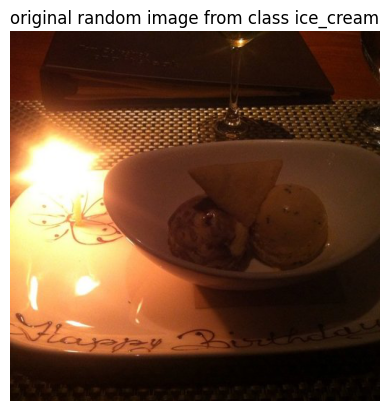

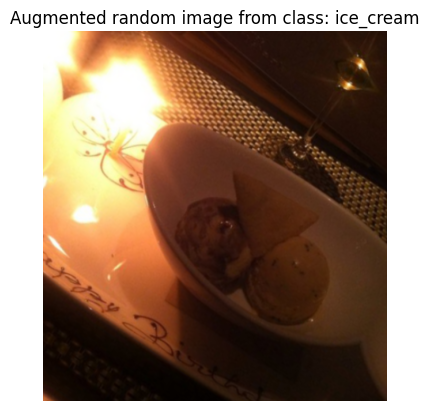

In [ ]:
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/"+random_image

# Read in and plot random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class {target_class}")
plt.axis(False)
# print(img)
# # Now let's plot our augmented image
# aug_image = data_augmentation(img)
# plt.figure()
# plt.imshow(aug_image)
# plt.title(f"Augmented random image from class {target_class}")
# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


## model 1 : feature extraction transfer learning with one percent of data with data augmentation


In [ ]:
# Set up the input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layers
inputs = layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation sequential model as a layer
x = data_augmentation(inputs)

# Give base model to the input(after augmentation) and don't train it
x = base_model(x, training = False)

# pool output features of the base model
x = layers.GlobalAveragePooling2D(name = "global_pooling_layer")(x)

# Put a dense layers as an output
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)

# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230726-142122
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.4327 - accuracy: 0.0429 - val_loss: 2.1837 - val_accuracy: 0.2303
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1100 - accuracy: 0.2000 - val_loss: 2.0730 - val_accuracy: 0.2812
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9530 - accuracy: 0.3143 - val_loss: 1.9501 - val_accuracy: 0.3651
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.7591 - accuracy: 0.5000 - val_loss: 1.8277 - val_accuracy: 0.4556
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6483 - accuracy: 0.6286 - val_loss: 1.7427 - val_accuracy: 0.4918


In [ ]:
IMG_SIZE + (3, )

(224, 224, 3)

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  (None, None, 3)          0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_pooling_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
# evaluate on the full dataset
model_1.evaluate(test_data)

79/79 [==============================] - 8s 92ms/step - loss: 1.7774 - accuracy: 0.4496


[1.7773865461349487, 0.4496000111103058]

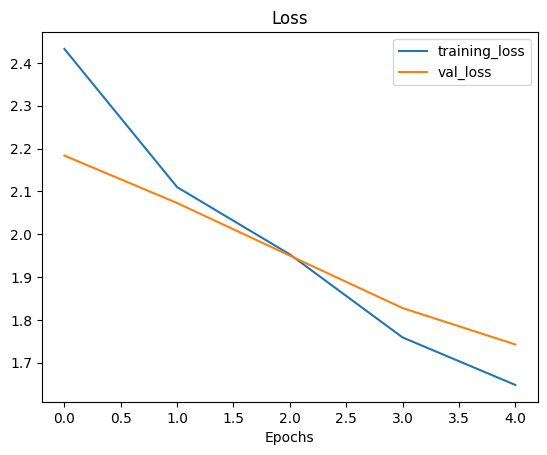

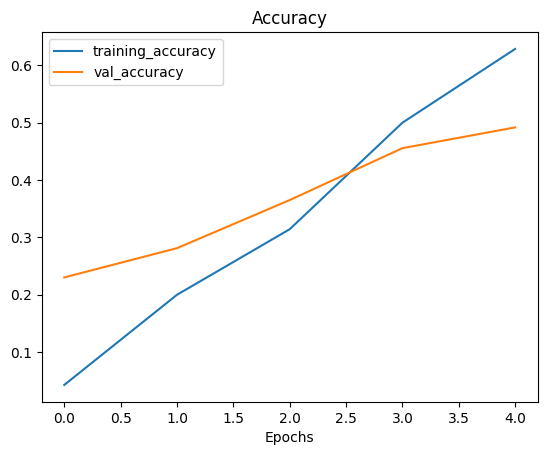

In [ ]:

# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)


## Model_2 with 10 percent training data and also having data aungmentation

In [ ]:
input_shape = (224, 224)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape = input_shape, name = "input_shape")

# data augmentation
x = data_augmentation(inputs)

# Give base_model to the input
x = base_model(x, training = False)

# Pooling
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
# make a model using the inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)


In [ ]:
# Compile the model

In [ ]:
# fit the model